In [1]:
!python -m pip install opencv-python

In [3]:
import cv2
import numpy as np
import pandas as pd

In [8]:
# Load YOLO
net = cv2.dnn.readNet("/kaggle/input/yolo-dataset/yolov3.weights", "/kaggle/input/object-detection/yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
classes = []
with open("/kaggle/input/yolo-dataset/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

img = pd.read_csv("/kaggle/input/object-detection-using-yolov3/od_sub1.csv")
img.iloc[0][0]

/tmp/ipykernel_30/1146665265.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img.iloc[0][0]


'00000b4dcff7f799.jpg'

In [18]:
# Load image

image = cv2.imread("/kaggle/input/hope-image/Hope.PNG")
height, width, channels = image.shape

In [19]:
# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Forward pass
outs = net.forward(output_layers)

# Information to show on the screen
class_ids = []
confidences = []
boxes = []

In [20]:
# Loop through detections
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Max Suppression to remove multiple overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

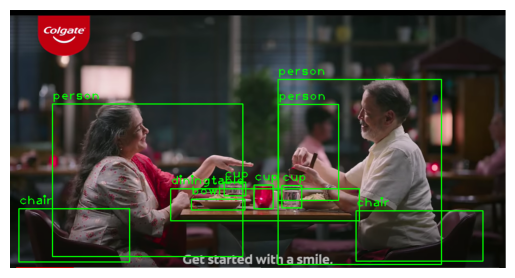

In [24]:
import matplotlib.pyplot as plt
# Draw bounding boxes and labels
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = (0, 255, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), font, 2, color, 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Hide the axes
plt.show()
# Show the output image with detected objects
#cv2.imshow("Image", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()